In [409]:
import cv2 as cv
import numpy as np
import math
from matplotlib import pyplot as plt

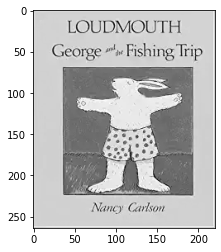

In [410]:
#convert to grayscale
img=cv.imread('book.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")

In [411]:
def convolution(image, kernel):
    kernel = np.flip(kernel)#flipping kernel
    
    kHeight = kernel.shape[0]#height of the kernel Not taking width as both are same

    iHeight = image.shape[0]#height of image
    iWidth = image.shape[1]#width of image
    
    h = m.floor(kHeight/2)#mid of kernel floor to convert into integer
    w = h
    convolute = np.zeros(image.shape)#convolution matrix
    result = 0
    
    for i in range(h,iHeight-h):
        for j in range (w,iWidth-w):
            for x in range(kHeight):
                for y in range (kHeight):
                    result=result+image[i-h+x][j-w+y]*kernel[x][y]#computing each cell value
            convolute[i][j]=result#storing cell value
            result = 0
    return convolute          #returning convolution matrix          

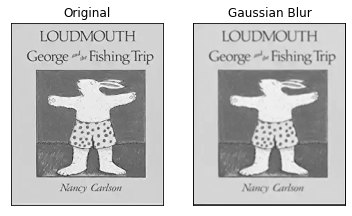

In [412]:
guassian_blur=np.zeros(gray.shape)
#gaussian kernel
kernel = 1/16*(np.array([[1,2,1],[2,4,2],[1,2,1]]))
guassian_blur = convolution(gray,kernel)
#saving image
cv.imwrite("GaussianBlur.jpg",guassian_blur)
#displaying images
plt.subplot(121)
plt.imshow(gray,cmap="gray")
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(guassian_blur,cmap="gray")
plt.title('Gaussian Blur')
plt.xticks([])
plt.yticks([])
plt.show()

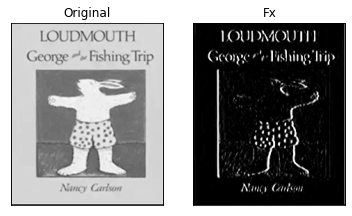

In [413]:
#fx gradient
imageX = np.zeros(guassian_blur.shape)
#sobel kernel
kernel = (np.array([[-1,0,1],[-2,0,2],[-1,0,1]]))
imageX = convolution(guassian_blur,kernel)
#saving image
cv.imwrite("Fx.jpg",imageX)
#displaying images
plt.subplot(121)
X = cv.imread("Fx.jpg");
plt.imshow(guassian_blur,cmap="gray")
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(X,cmap="gray")
plt.title('Fx')
plt.xticks([])
plt.yticks([])
plt.show()

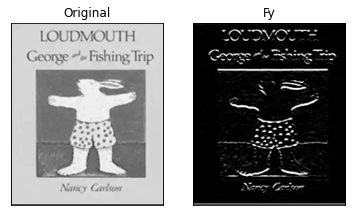

In [414]:
#fy gradient
imageY=np.zeros(guassian_blur.shape)
#sobel kernel
kernel = (np.array([[-1,-2,-1],[0,0,0],[1,2,1]]))
imageY = convolution(guassian_blur,kernel)
#saving image
cv.imwrite("Fy.jpg",imageY)
Y = cv.imread("Fy.jpg");
#displaying images
plt.subplot(121)
plt.imshow(guassian_blur,cmap="gray")
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(Y,cmap="gray")
plt.title('Fy')
plt.xticks([])
plt.yticks([])
plt.show()

In [415]:
#magnitude of gradients
def magnitude(img1,img2):
    array = np.zeros(img1.shape)
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            array[i][j] = math.sqrt((img1[i][j]**2 + img2[i][j]**2))
    return array

([], [])

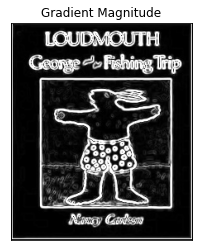

In [432]:
M = magnitude(imageX,imageY)
cv.imwrite("Magnitude.jpg",magnitude(imageX,imageY))
AB = cv.imread("Magnitude.jpg")
plt.imshow(AB)
plt.title('Gradient Magnitude')
plt.xticks([])
plt.yticks([])

In [417]:
#direction of pixels
def direction(img1,img2):
    direct= np.arctan2(img1,img2)
    direct=np.rad2deg(direct)
    direct+= 180;
    return direct

([], [])

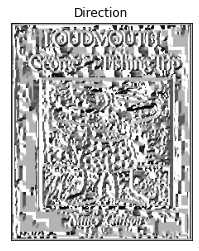

In [433]:
D = direction(imageX,imageY)
cv.imwrite("Direction.jpg",direction(imageX,imageY))
A = cv.imread("Direction.jpg")
plt.imshow(A)
plt.title('Direction')
plt.xticks([])
plt.yticks([])

In [419]:
#non maxima suppression
def supression(arr,img):
    array=np.zeros(img.shape)

    for i in range(1, img.shape[0]-1):
        for j in range (1, img.shape[1]-1):
            #left-right
            if ((arr[i][j]<22.5 and arr[i][j]>=0) or (arr[i][j] >=337.5 and arr[i][j]<360) or (arr[i][j]>=157.5 and arr[i][j]<202.5)):
                p=arr[i][j+1]
                q=arr[i][j-1]
            #top-bottom
            elif((arr[i][j]>=67.5 and arr[i][j] <112.5) or (arr[i][j]>=247.5 and arr[i][j] <292.5)):
                p=arr[i+1][j]
                q=arr[i-1][j]
            #off diagnol
            elif((arr[i][j]>=22.5 and arr[i][j] <67.5) or (arr[i][j]>=202.5 and arr[i][j] <247.5)):
                p=arr[i-1][j+1]
                q=arr[i+1][j-1]
            #diagnol
            elif((arr[i][j]>=112.5 and arr[i][j] <157.5) or (arr[i][j]>=292.5 and arr[i][j] <337.5)):
                p=arr[i+1][j+1]
                q=arr[i-1][j-1]
            if(img[i][j]>=p and img[i][j]>=q):
                array[i][j]=img[i][j]
    return array
            

([], [])

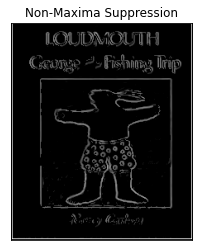

In [434]:
P= supression(D,M)
plt.imshow(P,cmap="gray")
cv.imwrite("Suppression.jpg",supression(D,M))
S = cv.imread("Suppression.jpg")
plt.title('Non-Maxima Suppression')
plt.xticks([])
plt.yticks([])

In [425]:
#hysterisis
def hysteresis(IM):
    #Thresholds
    th=180
    tl=100
    for i in range (IM.shape[0]):
        for j in range (IM.shape[1]):
            #comparing image with thresholds
            if(IM[i][j]>=th):
                IM[i][j]=255
            elif(IM[i][j]<=tl):
                IM[i][j]=0
            else:
                IM[i][j]=50
    #checking neighbor of weak thresholds
    for i in range (1,IM.shape[0]-1):
        for j in range (1,IM.shape[1]-1):
            if(IM[i][j]==50):
                if(IM[i-1][j] == 255 or IM[i+1][j] == 255 or IM[i][j-1] == 255 or IM[i][j+1] == 255 or IM[i-1][j-1] == 255 or IM[i+1][j-1] == 255 or IM[i+1][j+1] == 255 or IM[i-1][j+1] == 255):
                    img[i][j]=255
    return IM

([], [])

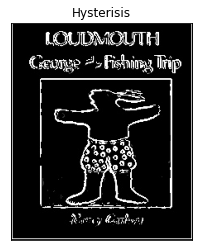

In [435]:
H = hysteresis(supression(D,M))
cv.imwrite("Hysteresis.jpg",H)
S = cv.imread("Hysteresis.jpg")
plt.imshow(S)
plt.title('Hysterisis')
plt.xticks([])
plt.yticks([])